In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import time

import sys
sys.path.append('../')
from src.models.hubbard_model import *
from src.models.ising_model import *
from src.models.heisenberg_model import *
from src.evolution.cpfs_not_compiled import *

import matplotlib.pyplot as plt
# plt settings
plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":11})          # specify font size here

# Non-perturbed systems

## Heisenberg model

In [11]:
# Heisenberg Hamiltonian with size = n spins
n=8
H_hei = heisenberg_model(n).matrix()
A_hei = heisenberg_model_even(n).matrix()
B_hei = heisenberg_model_odd(n).matrix()

In [12]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF1_errors_hei = data_CPF_error(1, H_hei, A_hei, B_hei, time_ticks, nsteps)
data_CPF2_errors_hei = data_CPF_error(2, H_hei, A_hei, B_hei, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 2.575 mins


<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/2471462264.py:29: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_CPF1com_rsteps_error_hei, '.', color='blue', label='CPF1 Comp: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/2471462264.py:34: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x, (x/180)**3   , color='green',  label='$\propto t^3$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/2471462264.py:37: SyntaxWarning: invalid escape sequence '\

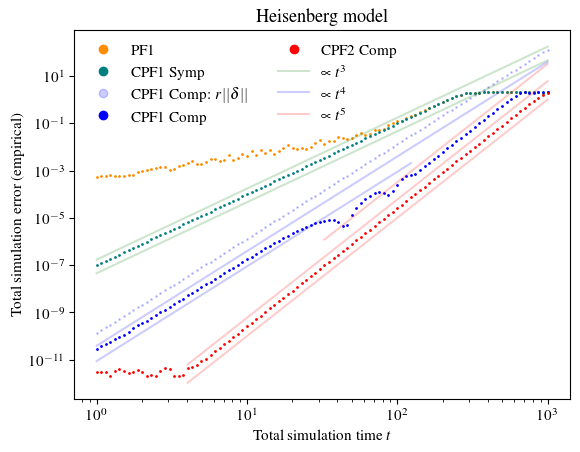

In [13]:
fig, ax = plt.subplots(#figsize=(8,6)
                      )

num_time_ticks = len(time_ticks)

x = time_ticks
r = nsteps

y_PF1_error_hei      = [data_CPF1_errors_hei[i][3] for i in range(0,num_time_ticks)]
y_CPF1symp_error_hei = [data_CPF1_errors_hei[i][4] for i in range(0,num_time_ticks)]
y_CPF1com_error_hei  = [data_CPF1_errors_hei[i][5] for i in range(0,num_time_ticks)]

y_PF2_error_hei      = [data_CPF2_errors_hei[i][3] for i in range(0,num_time_ticks)]
y_CPF2symp_error_hei = [data_CPF2_errors_hei[i][4] for i in range(0,num_time_ticks)]
y_CPF2com_error_hei  = [data_CPF2_errors_hei[i][5] for i in range(0,num_time_ticks)]


y_CPF1com_step_error_hei  = [data_CPF1_errors_hei[i][2] for i in range(0,num_time_ticks)]
y_CPF1com_rsteps_error_hei = list(r*np.array(y_CPF1com_step_error_hei))


y_PF1_error_scaling = r*((x/r)**2)
y_PF2_error_scaling = r*((x/r)**3)


plt.loglog(x, y_PF1_error_hei    , '.', color='darkorange',  label='PF1', markersize=2)
plt.loglog(x, y_CPF1symp_error_hei, '.', color='teal',   label='CPF1 Symp', markersize=2)

plt.loglog(x, y_CPF1com_rsteps_error_hei, '.', color='blue', label='CPF1 Comp: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_CPF1com_error_hei, '.', color='blue',   label='CPF1 Comp', markersize=2)

plt.loglog(x, y_CPF2com_error_hei, '.', color='red',   label='CPF2 Comp', markersize=2)

plt.loglog(x, (x/180)**3   , color='green',  label='$\propto t^3$', markersize=2, alpha=0.2)
plt.loglog(x, (x/280)**3   , color='green', markersize=2, alpha=0.2)

plt.loglog(x, (x/400)**4   , color='blue', label='$\propto t^4$', markersize=2, alpha=0.2)
plt.loglog(x[:70], (x[:70]/580)**4   , color='blue', markersize=2, alpha=0.2)

plt.loglog(x[50:], (x[50:]/500)**5   , color='red', markersize=2, alpha=0.2, label='$\propto t^5$',)
plt.loglog(x[20:], (x[20:]/700)**5   , color='red', markersize=2, alpha=0.2)
plt.loglog(x[20:], (x[20:]/1000)**5  , color='red', markersize=2, alpha=0.2)

plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')

#plt.legend(markerscale=6, loc='top')

ax.legend(markerscale=6, ncol=2, #, loc='upper center', bbox_to_anchor=(0.5, 1.05)
          fancybox=True, frameon=False #, shadow=True
         )

#plt.title('Effect of correctors on simulation error for Heisenberg model')
plt.title('Heisenberg model')
plt.show()

fig.savefig('../plots/CPFs_hei.pdf', dpi=300, bbox_inches='tight', transparent=False)

## Hubbard model with intermediate coupling

In [14]:
# intermiediate coupling: U_int = 2 * t_hop
H_hub_ic, A_hub_ic, B_hub_ic = intermediate_coupling_hubbard_model(size = 8)

In [15]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF1_errors_hub_ic = data_CPF_error(1, H_hub_ic, A_hub_ic, B_hub_ic, time_ticks, nsteps)
data_CPF2_errors_hub_ic = data_CPF_error(2, H_hub_ic, A_hub_ic, B_hub_ic, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 2.806 mins


<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/1378123688.py:28: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_CPF1com_rsteps_error_hub_ic, '.', color='blue', label='CPF1 Comp: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/1378123688.py:33: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x, (x/500)**3   , color='green',  label='$\propto t^3$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/1378123688.py:36: SyntaxWarning: invalid escape sequence

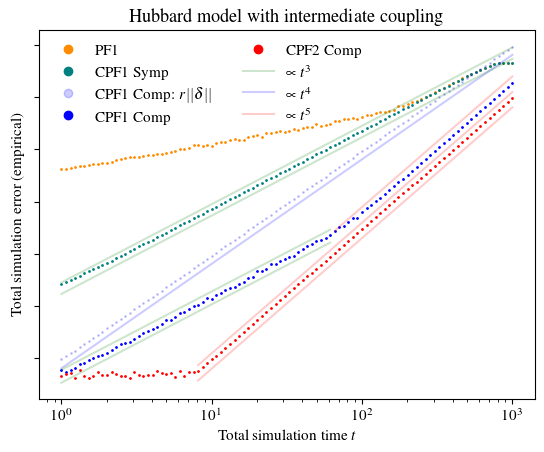

In [16]:
fig, ax = plt.subplots(#figsize=(8,6)
                      )

num_time_ticks = len(time_ticks)
x = time_ticks
r = nsteps

y_PF1_error_hub_ic      = [data_CPF1_errors_hub_ic[i][3] for i in range(0,num_time_ticks)]
y_CPF1symp_error_hub_ic = [data_CPF1_errors_hub_ic[i][4] for i in range(0,num_time_ticks)]
y_CPF1com_error_hub_ic  = [data_CPF1_errors_hub_ic[i][5] for i in range(0,num_time_ticks)]

y_PF2_error_hub_ic      = [data_CPF2_errors_hub_ic[i][3] for i in range(0,num_time_ticks)]
y_CPF2symp_error_hub_ic = [data_CPF2_errors_hub_ic[i][4] for i in range(0,num_time_ticks)]
y_CPF2com_error_hub_ic  = [data_CPF2_errors_hub_ic[i][5] for i in range(0,num_time_ticks)]


y_CPF1com_step_error_hub_ic  = [data_CPF1_errors_hub_ic[i][2] for i in range(0,num_time_ticks)]
y_CPF1com_rsteps_error_hub_ic = list(r*np.array(y_CPF1com_step_error_hub_ic))


y_PF1_error_scaling = r*((x/r)**2)
y_PF2_error_scaling = r*((x/r)**3)


plt.loglog(x, y_PF1_error_hub_ic    , '.', color='darkorange',  label='PF1', markersize=2)
plt.loglog(x, y_CPF1symp_error_hub_ic, '.', color='teal',   label='CPF1 Symp', markersize=2)

plt.loglog(x, y_CPF1com_rsteps_error_hub_ic, '.', color='blue', label='CPF1 Comp: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_CPF1com_error_hub_ic, '.', color='blue',   label='CPF1 Comp', markersize=2)

plt.loglog(x, y_CPF2com_error_hub_ic, '.', color='red',   label='CPF2 Comp', markersize=2)

plt.loglog(x, (x/500)**3   , color='green',  label='$\propto t^3$', markersize=2, alpha=0.2)
plt.loglog(x, (x/700)**3   , color='green', markersize=2, alpha=0.2)

plt.loglog(x, (x/700)**4   , color='blue', label='$\propto t^4$', markersize=2, alpha=0.2)

plt.loglog(x[:60], (x[:60]/6500)**3   , color='green', markersize=2, alpha=0.2)
plt.loglog(x[:60], (x[:60]/9500)**3   , color='green', markersize=2, alpha=0.2)

plt.loglog(x[60:], (x[60:]/1100)**5   , color='red', markersize=2, alpha=0.2, label='$\propto t^5$',)
plt.loglog(x[30:], (x[30:]/1450)**5   , color='red', markersize=2, alpha=0.2)
plt.loglog(x[30:], (x[30:]/1900)**5  , color='red', markersize=2, alpha=0.2)

plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')

#plt.legend(markerscale=6, loc='top')

ax.legend(markerscale=6, ncol=2, loc = 'best', #, loc='upper center', bbox_to_anchor=(0.5, 1.05)
          fancybox=True,frameon=False#, shadow=True
         )
ax.axes.yaxis.set_ticklabels([])
#plt.tight_layout(pad=.1)

#plt.title('Effect of correctors on simulation error for Heisenberg model')
plt.title('Hubbard model with intermediate coupling')
plt.show()

fig.savefig('../plots/CPFs_hub_ic.pdf', dpi=300, bbox_inches='tight', transparent=False)

## Transverse-field Ising model

In [19]:
H_isg, A_isg, B_isg = ising_qubit_hamiltonian(8,1,1)
H_isg = H_isg.to_matrix()
A_isg = A_isg.to_matrix()
B_isg = B_isg.to_matrix()

In [22]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF1_errors_isg = data_CPF_error(1, H_isg, A_isg, B_isg, time_ticks, nsteps)
data_CPF2_errors_isg = data_CPF_error(2, H_isg, A_isg, B_isg, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 3.736 mins


<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/380194050.py:28: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_CPF1com_rsteps_error_isg, '.', color='blue', label='CPF1 Comp: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/380194050.py:33: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x, (x/300)**3   , color='green',  label='$\propto t^3$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/380194050.py:36: SyntaxWarning: invalid escape sequence '\p'


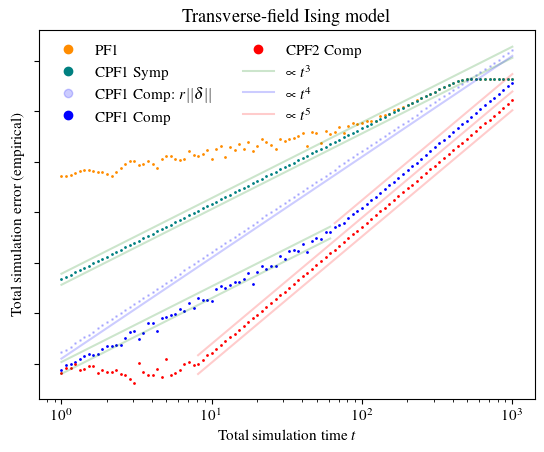

In [24]:
fig, ax = plt.subplots(#figsize=(8,6)
                      )

num_time_ticks = len(time_ticks)
x = time_ticks
r = nsteps

y_PF1_error_isg      = [data_CPF1_errors_isg[i][3] for i in range(0,num_time_ticks)]
y_CPF1symp_error_isg = [data_CPF1_errors_isg[i][4] for i in range(0,num_time_ticks)]
y_CPF1com_error_isg  = [data_CPF1_errors_isg[i][5] for i in range(0,num_time_ticks)]

y_PF2_error_isg      = [data_CPF2_errors_isg[i][3] for i in range(0,num_time_ticks)]
y_CPF2symp_error_isg = [data_CPF2_errors_isg[i][4] for i in range(0,num_time_ticks)]
y_CPF2com_error_isg  = [data_CPF2_errors_isg[i][5] for i in range(0,num_time_ticks)]


y_CPF1com_step_error_isg  = [data_CPF1_errors_isg[i][2] for i in range(0,num_time_ticks)]
y_CPF1com_rsteps_error_isg = list(r*np.array(y_CPF1com_step_error_isg))


y_PF1_error_scaling = r*((x/r)**2)
y_PF2_error_scaling = r*((x/r)**3)


plt.loglog(x, y_PF1_error_isg    , '.', color='darkorange',  label='PF1', markersize=2)
plt.loglog(x, y_CPF1symp_error_isg, '.', color='teal',   label='CPF1 Symp', markersize=2)

plt.loglog(x, y_CPF1com_rsteps_error_isg, '.', color='blue', label='CPF1 Comp: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_CPF1com_error_isg, '.', color='blue',   label='CPF1 Comp', markersize=2)

plt.loglog(x, y_CPF2com_error_isg, '.', color='red',   label='CPF2 Comp', markersize=2)

plt.loglog(x, (x/300)**3   , color='green',  label='$\propto t^3$', markersize=2, alpha=0.2)
plt.loglog(x, (x/420)**3   , color='green', markersize=2, alpha=0.2)

plt.loglog(x, (x/500)**4   , color='blue', label='$\propto t^4$', markersize=2, alpha=0.2)

plt.loglog(x[:60], (x[:60]/4400)**3   , color='green', markersize=2, alpha=0.2)
plt.loglog(x[:60], (x[:60]/6300)**3   , color='green', markersize=2, alpha=0.2)

plt.loglog(x[60:], (x[60:]/800)**5   , color='red', markersize=2, alpha=0.2, label='$\propto t^5$',)
plt.loglog(x[30:], (x[30:]/1100)**5   , color='red', markersize=2, alpha=0.2)
plt.loglog(x[30:], (x[30:]/1550)**5  , color='red', markersize=2, alpha=0.2)

plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')

#plt.legend(markerscale=6, loc='top')

ax.legend(markerscale=6, ncol=2, #, loc='upper center', bbox_to_anchor=(0.5, 1.05)
          fancybox=True, frameon=False #, shadow=True
         )
ax.axes.yaxis.set_ticklabels([])

#plt.title('Effect of correctors on simulation error for Heisenberg model')
plt.title('Transverse-field Ising model')
plt.show()

fig.savefig('../plots/CPFs_isg.pdf', dpi=300, bbox_inches='tight', transparent=False)

# Perturbed systems

## Hubbard model with weak coupling

In [25]:
# Weak hopping Hubbard Hamiltonian
# Hubbard model with with n = size fermions where t_hop = alpha , U_int = 1

H_hub_wc, A_hub_wc, B_hub_wc = weak_coupling_hubbard_model(size=8, alpha= 0.001)

In [26]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF1_errors_hub_wc = data_CPF_error(1, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)
data_CPF2_errors_hub_wc = data_CPF_error(2, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 2.187 mins


<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/402386425.py:26: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_PF1_rsteps_error_hub_wc   , '.', color='darkorange',  label='PF1: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/402386425.py:30: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_PF2_rsteps_error_hub_wc   , '.', color='green',  label='PF2: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/402386425.py:36: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x[30:], (x[30:]/80000)**3, color='red',   label='$\propto t^3

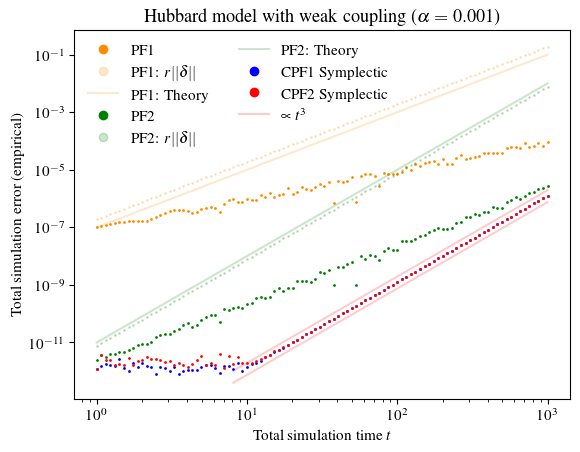

In [27]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)
x = time_ticks
r = nsteps
alpha = 0.001

y_PF1_step_error_hub_wc = [data_CPF1_errors_hub_wc[i][0] for i in range(0,num_time_ticks)]
y_PF1_error_hub_wc      = [data_CPF1_errors_hub_wc[i][3] for i in range(0,num_time_ticks)]
y_CPF1_error_hub_wc     = [data_CPF1_errors_hub_wc[i][4] for i in range(0,num_time_ticks)]

y_PF2_step_error_hub_wc = [data_CPF2_errors_hub_wc[i][0] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wc      = [data_CPF2_errors_hub_wc[i][3] for i in range(0,num_time_ticks)]
y_CPF2_error_hub_wc     = [data_CPF2_errors_hub_wc[i][4] for i in range(0,num_time_ticks)]


y_PF1_error_scaling = r*(alpha)*((x/r)**2)
y_PF2_error_scaling = r*(alpha)*((x/r)**3)


y_PF1_rsteps_error_hub_wc = list(r*np.array(y_PF1_step_error_hub_wc))
y_PF2_rsteps_error_hub_wc = list(r*np.array(y_PF2_step_error_hub_wc))


plt.loglog(x, y_PF1_error_hub_wc    , '.', color='darkorange',  label='PF1', markersize=2)
plt.loglog(x, y_PF1_rsteps_error_hub_wc   , '.', color='darkorange',  label='PF1: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_PF1_error_scaling , color='darkorange',  label='PF1: Theory', markersize=2, alpha=0.2)

plt.loglog(x, y_PF2_error_hub_wc    , '.', color='green',  label='PF2', markersize=2)
plt.loglog(x, y_PF2_rsteps_error_hub_wc   , '.', color='green',  label='PF2: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_PF2_error_scaling   , color='green',  label='PF2: Theory', markersize=2, alpha=0.2)

plt.loglog(x, y_CPF1_error_hub_wc, '.', color='blue',  label='CPF1 Symplectic', markersize=2)
plt.loglog(x, y_CPF2_error_hub_wc, '.', color='red',   label='CPF2 Symplectic', markersize=2)

plt.loglog(x[30:], (x[30:]/80000)**3, color='red',   label='$\propto t^3$', markersize=2, alpha=0.2)
plt.loglog(x[30:], (x[30:]/110000)**3, color='red', markersize=2, alpha=0.2)

plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')

#plt.legend(markerscale=6, loc='top')

ax.legend(markerscale=6, loc = 'best', #bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, frameon=False)

plt.title('Hubbard model with weak coupling ($\\alpha=0.001$)')
plt.show()

fig.savefig('../plots/CPFs_hub_wc.pdf', dpi=300, bbox_inches='tight', transparent=False)

## Hubbard model with weak hopping

In [28]:
# Weak hopping Hubbard Hamiltonian
# Hubbard model with with n = size fermions where t_hop = alpha , U_int = 1

H_hub_wh, A_hub_wh, B_hub_wh = weak_hopping_hubbard_model(size=8, alpha= 0.001)


In [29]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF1_errors_hub_wh = data_CPF_error(1, H_hub_wh, A_hub_wh, B_hub_wh, time_ticks, nsteps)
data_CPF2_errors_hub_wh = data_CPF_error(2, H_hub_wh, A_hub_wh, B_hub_wh, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 3.065 mins


<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/3642368457.py:28: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_PF1_rsteps_error_hub_wh   , '.', color='darkorange',  label='PF1: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/3642368457.py:32: SyntaxWarning: invalid escape sequence '\d'
  plt.loglog(x, y_PF2_rsteps_error_hub_wh   , '.', color='green',  label='PF2: $r||\delta||$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/3642368457.py:38: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x[30:], (x[30:]/45000)**3, color='red',   label='$\propto 

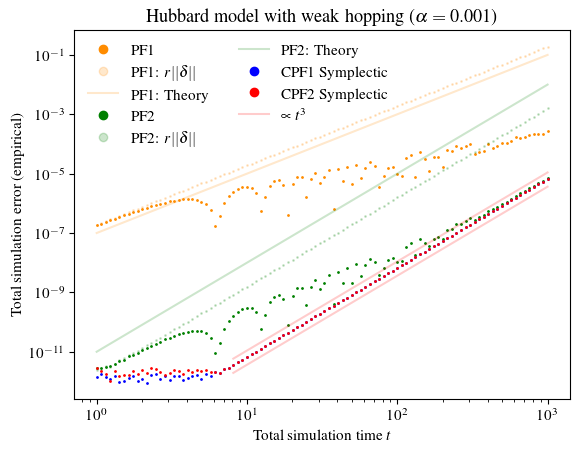

In [30]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)
x = time_ticks
r = nsteps
alpha = 0.001


y_PF1_step_error_hub_wh = [data_CPF1_errors_hub_wh[i][0] for i in range(0,num_time_ticks)]
y_PF1_error_hub_wh      = [data_CPF1_errors_hub_wh[i][3] for i in range(0,num_time_ticks)]
y_CPF1_error_hub_wh    = [data_CPF1_errors_hub_wh[i][4] for i in range(0,num_time_ticks)]

y_PF2_step_error_hub_wh = [data_CPF2_errors_hub_wh[i][0] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wh      = [data_CPF2_errors_hub_wh[i][3] for i in range(0,num_time_ticks)]
y_CPF2_error_hub_wh     = [data_CPF2_errors_hub_wh[i][4] for i in range(0,num_time_ticks)]



y_PF1_error_scaling = r*(alpha)*((x/r)**2)
y_PF2_error_scaling = r*(alpha)*((x/r)**3)


y_PF1_rsteps_error_hub_wh = list(r*np.array(y_PF1_step_error_hub_wh))
y_PF2_rsteps_error_hub_wh = list(r*np.array(y_PF2_step_error_hub_wh))


plt.loglog(x, y_PF1_error_hub_wh    , '.', color='darkorange',  label='PF1', markersize=2)
plt.loglog(x, y_PF1_rsteps_error_hub_wh   , '.', color='darkorange',  label='PF1: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_PF1_error_scaling , color='darkorange',  label='PF1: Theory', markersize=2, alpha=0.2)

plt.loglog(x, y_PF2_error_hub_wh    , '.', color='green',  label='PF2', markersize=2)
plt.loglog(x, y_PF2_rsteps_error_hub_wh   , '.', color='green',  label='PF2: $r||\delta||$', markersize=2, alpha=0.2)
plt.loglog(x, y_PF2_error_scaling   , color='green',  label='PF2: Theory', markersize=2, alpha=0.2)

plt.loglog(x, y_CPF1_error_hub_wh, '.', color='blue',   label='CPF1 Symplectic', markersize=2)
plt.loglog(x, y_CPF2_error_hub_wh, '.', color='red',   label='CPF2 Symplectic', markersize=2)

plt.loglog(x[30:], (x[30:]/45000)**3, color='red',   label='$\propto t^3$', markersize=2, alpha=0.2)
plt.loglog(x[30:], (x[30:]/65000)**3, color='red', markersize=2, alpha=0.2)

plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')

#plt.legend(markerscale=6, loc='top')

ax.legend(markerscale=6, loc='upper left', #bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, frameon=False)

plt.title('Hubbard model with weak hopping ($\\alpha=0.001$)')
plt.show()

fig.savefig('../plots/CPFs_hub_wh.pdf', dpi=300, bbox_inches='tight', transparent=False)

# Hubbard model with various perturbation parameter

## Weak coupling regime

In [35]:
alpha1 = 10**(-1)
alpha2 = 10**(-2)
alpha3 = 10**(-3)
alpha4 = 10**(-4)

H_hub_wc1, A_hub_wc1, B_hub_wc1 = weak_coupling_hubbard_model(size=8, alpha = alpha1)
H_hub_wc2, A_hub_wc2, B_hub_wc2 = weak_coupling_hubbard_model(size=8, alpha = alpha2)
H_hub_wc3, A_hub_wc3, B_hub_wc3 = weak_coupling_hubbard_model(size=8, alpha = alpha3)
H_hub_wc4, A_hub_wc4, B_hub_wc4 = weak_coupling_hubbard_model(size=8, alpha = alpha4)

In [36]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF2_errors_hub_wc1 = data_CPF2_symp_error(H_hub_wc1, A_hub_wc1, B_hub_wc1, time_ticks, nsteps)
data_CPF2_errors_hub_wc2 = data_CPF2_symp_error(H_hub_wc2, A_hub_wc3, B_hub_wc2, time_ticks, nsteps)
data_CPF2_errors_hub_wc3 = data_CPF2_symp_error(H_hub_wc3, A_hub_wc3, B_hub_wc3, time_ticks, nsteps)
data_CPF2_errors_hub_wc4 = data_CPF2_symp_error(H_hub_wc4, A_hub_wc4, B_hub_wc4, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 3.303 mins


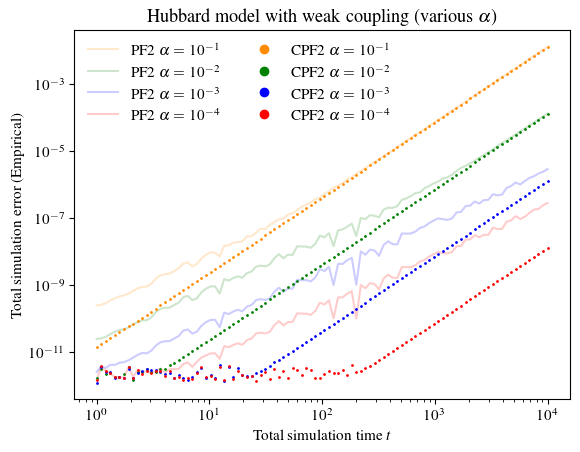

In [45]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)
x = time_ticks
r = nsteps

y_PF2_error_hub_wc1 = [data_CPF2_errors_hub_wc1[i][2] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wc2 = [data_CPF2_errors_hub_wc2[i][2] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wc3 = [data_CPF2_errors_hub_wc3[i][2] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wc4 = [data_CPF2_errors_hub_wc4[i][2] for i in range(0,num_time_ticks)]

y_CPF2_symp_error_hub_wc1 = [data_CPF2_errors_hub_wc1[i][3] for i in range(0,num_time_ticks)]
y_CPF2_symp_error_hub_wc2 = [data_CPF2_errors_hub_wc2[i][3] for i in range(0,num_time_ticks)]
y_CPF2_symp_error_hub_wc3 = [data_CPF2_errors_hub_wc3[i][3] for i in range(0,num_time_ticks)]
y_CPF2_symp_error_hub_wc4 = [data_CPF2_errors_hub_wc4[i][3] for i in range(0,num_time_ticks)]


plt.loglog(x, y_PF2_error_hub_wc1, color='darkorange',  label='PF2 $\\alpha=10^{-1}$', markersize=2,alpha=0.2)
plt.loglog(x, y_PF2_error_hub_wc2, color='green',  label='PF2 $\\alpha=10^{-2}$', markersize=2,alpha=0.2)
plt.loglog(x, y_PF2_error_hub_wc3, color='blue',  label='PF2 $\\alpha=10^{-3}$', markersize=2,alpha=0.2)
plt.loglog(x, y_PF2_error_hub_wc4, color='red',  label='PF2 $\\alpha=10^{-4}$', markersize=2,alpha=0.2)

plt.loglog(x, y_CPF2_symp_error_hub_wc1 , '.', color='darkorange',  label='CPF2 $\\alpha=10^{-1}$', markersize=2)
plt.loglog(x, y_CPF2_symp_error_hub_wc2 , '.', color='green',  label='CPF2 $\\alpha=10^{-2}$', markersize=2)
plt.loglog(x, y_CPF2_symp_error_hub_wc3 , '.', color='blue',  label='CPF2 $\\alpha=10^{-3}$', markersize=2)
plt.loglog(x, y_CPF2_symp_error_hub_wc4 , '.', color='red',  label='CPF2 $\\alpha=10^{-4}$', markersize=2)


plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (Empirical)')

ax.legend(markerscale=6, loc='upper left', #bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, frameon=False)

plt.title('Hubbard model with weak coupling (various $\\alpha$)')
plt.show()

fig.savefig('../plots/CPF2_hub_wcs.pdf', dpi=300, bbox_inches='tight', transparent=False)

## Weak hopping regime

In [46]:
alpha1 = 10**(-1)
alpha2 = 10**(-2)
alpha3 = 10**(-3)
alpha4 = 10**(-4)

H_hub_wh1, A_hub_wh1, B_hub_wh1 = weak_hopping_hubbard_model(size=8, alpha = alpha1)
H_hub_wh2, A_hub_wh2, B_hub_wh2 = weak_hopping_hubbard_model(size=8, alpha = alpha2)
H_hub_wh3, A_hub_wh3, B_hub_wh3 = weak_hopping_hubbard_model(size=8, alpha = alpha3)
H_hub_wh4, A_hub_wh4, B_hub_wh4 = weak_hopping_hubbard_model(size=8, alpha = alpha4)

In [39]:
nsteps = 10000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF2_errors_hub_wh1 = data_CPF2_symp_error(H_hub_wh1, A_hub_wh1, B_hub_wh1, time_ticks, nsteps)
data_CPF2_errors_hub_wh2 = data_CPF2_symp_error(H_hub_wh2, A_hub_wh3, B_hub_wh2, time_ticks, nsteps)
data_CPF2_errors_hub_wh3 = data_CPF2_symp_error(H_hub_wh3, A_hub_wh3, B_hub_wh3, time_ticks, nsteps)
data_CPF2_errors_hub_wh4 = data_CPF2_symp_error(H_hub_wh4, A_hub_wh4, B_hub_wh4, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 3.681 mins


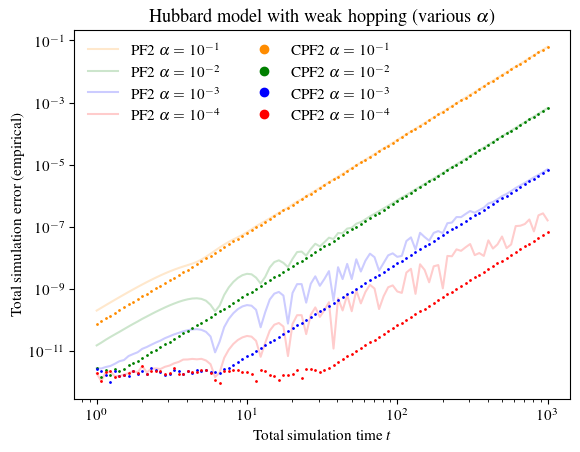

In [40]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)
x = time_ticks
r = nsteps


y_PF2_error_hub_wh1 = [data_CPF2_errors_hub_wh1[i][2] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wh2 = [data_CPF2_errors_hub_wh2[i][2] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wh3 = [data_CPF2_errors_hub_wh3[i][2] for i in range(0,num_time_ticks)]
y_PF2_error_hub_wh4 = [data_CPF2_errors_hub_wh4[i][2] for i in range(0,num_time_ticks)]

y_CPF2_symp_error_hub_wh1 = [data_CPF2_errors_hub_wh1[i][3] for i in range(0,num_time_ticks)]
y_CPF2_symp_error_hub_wh2 = [data_CPF2_errors_hub_wh2[i][3] for i in range(0,num_time_ticks)]
y_CPF2_symp_error_hub_wh3 = [data_CPF2_errors_hub_wh3[i][3] for i in range(0,num_time_ticks)]
y_CPF2_symp_error_hub_wh4 = [data_CPF2_errors_hub_wh4[i][3] for i in range(0,num_time_ticks)]


plt.loglog(x, y_PF2_error_hub_wh1, color='darkorange',  label='PF2 $\\alpha=10^{-1}$', markersize=2,alpha=0.2)
plt.loglog(x, y_PF2_error_hub_wh2, color='green',  label='PF2 $\\alpha=10^{-2}$', markersize=2,alpha=0.2)
plt.loglog(x, y_PF2_error_hub_wh3, color='blue',  label='PF2 $\\alpha=10^{-3}$', markersize=2,alpha=0.2)
plt.loglog(x, y_PF2_error_hub_wh4, color='red',  label='PF2 $\\alpha=10^{-4}$', markersize=2,alpha=0.2)

plt.loglog(x, y_CPF2_symp_error_hub_wh1 , '.', color='darkorange',  label='CPF2 $\\alpha=10^{-1}$', markersize=2)
plt.loglog(x, y_CPF2_symp_error_hub_wh2 , '.', color='green',  label='CPF2 $\\alpha=10^{-2}$', markersize=2)
plt.loglog(x, y_CPF2_symp_error_hub_wh3 , '.', color='blue',  label='CPF2 $\\alpha=10^{-3}$', markersize=2)
plt.loglog(x, y_CPF2_symp_error_hub_wh4 , '.', color='red',  label='CPF2 $\\alpha=10^{-4}$', markersize=2)


plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')

ax.legend(markerscale=6, loc='upper left', #bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, frameon=False)

plt.title('Hubbard model with weak hopping (various $\\alpha$)')
plt.show()

fig.savefig('../plots/CPF2_hub_whs.pdf', dpi=300, bbox_inches='tight', transparent=False)

# Higher-order CPFs for non-perturbed systems

## Heisenberg model

In [41]:
# Heisenberg Hamiltonian with n spins
n=8
H_hei = heisenberg_model(n).matrix()
A_hei = heisenberg_model_even(n).matrix()
B_hei = heisenberg_model_odd(n).matrix()

In [52]:
nsteps = 10000
time_ticks = np.logspace(0,4, num=100)

start_time = time.time()

data_CPF2_errors_hei = data_CPF_com_error(2, H_hei, A_hei, B_hei, time_ticks, nsteps)
data_CPF4_errors_hei = data_CPF_com_error(4, H_hei, A_hei, B_hei, time_ticks, nsteps)
data_CPF6_errors_hei = data_CPF_com_error(6, H_hei, A_hei, B_hei, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 7.166 mins


<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/2360434622.py:25: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x[22:73], (x[22:73]/750)**5   , color='blue',  label='$\propto t^5$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/2360434622.py:26: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x[50:87], (x[50:87]/2800)**7   , color='red',  label='$\propto t^7$', markersize=2, alpha=0.2)
/var/folders/kp/1c3pv9md7yqcgrrbs4qf8xpc0000gn/T/ipykernel_4008/2360434622.py:27: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(x[70:98], (x[70:98]/8000)**9   , color='green',  label='$\propto t^9$', markersize=2, a

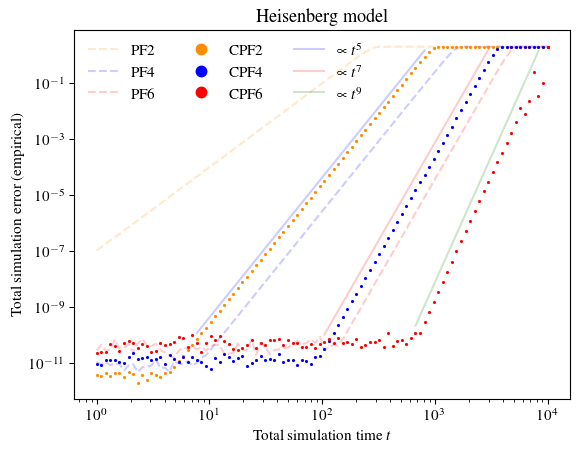

In [53]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)
x = time_ticks


y_PF2_error_hei      = [data_CPF2_errors_hei[i][2] for i in range(0,num_time_ticks)]
y_CPF2_error_hei     = [data_CPF2_errors_hei[i][3] for i in range(0,num_time_ticks)]

y_PF4_error_hei      = [data_CPF4_errors_hei[i][2] for i in range(0,num_time_ticks)]
y_CPF4_error_hei     = [data_CPF4_errors_hei[i][3] for i in range(0,num_time_ticks)]

y_PF6_error_hei      = [data_CPF6_errors_hei[i][2] for i in range(0,num_time_ticks)]
y_CPF6_error_hei     = [data_CPF6_errors_hei[i][3] for i in range(0,num_time_ticks)]


plt.loglog(x, y_PF2_error_hei    , ls="--", color='darkorange', label='PF2', alpha =0.2)
plt.loglog(x, y_PF4_error_hei    , ls="--", color='blue',   label='PF4', alpha =0.2)
plt.loglog(x, y_PF6_error_hei    , ls="--", color='red',  label='PF6', alpha =0.2)

plt.loglog(x, y_CPF2_error_hei    , '.', color='darkorange',  label='CPF2', markersize=2.5)
plt.loglog(x, y_CPF4_error_hei    , '.', color='blue',  label='CPF4', markersize=2.5)
plt.loglog(x, y_CPF6_error_hei    , '.', color='red',  label='CPF6', markersize=2.5)

plt.loglog(x[22:73], (x[22:73]/750)**5   , color='blue',  label='$\propto t^5$', markersize=2, alpha=0.2)
plt.loglog(x[50:87], (x[50:87]/2800)**7   , color='red',  label='$\propto t^7$', markersize=2, alpha=0.2)
plt.loglog(x[70:98], (x[70:98]/8000)**9   , color='green',  label='$\propto t^9$', markersize=2, alpha=0.2)


plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation error (empirical)')


ax.legend(markerscale=6, ncol=3, loc='upper left', #bbox_to_anchor=(0.5, 1.05)
          fancybox=True, frameon=False #, shadow=True
         )

#plt.title('Effect of correctors on simulation error for Heisenberg model')
plt.title('Heisenberg model')
plt.show()

fig.savefig('../plots/CPFs_hei.pdf', dpi=300, bbox_inches='tight', transparent=False)

# Higher-order CPFs for perturbed systems

## Hubbard model with weak coupling

In [54]:
H_hub_wc, A_hub_wc, B_hub_wc = weak_coupling_hubbard_model(size=8, alpha= 0.001)

In [55]:
nsteps = 1000
time_ticks = np.logspace(0,3, num=100)

start_time = time.time()

data_CPF2_perturbed_sys_hub_wc = data_CPF_perturbed_sys_error(2,2, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)
data_CPF4_perturbed_sys_hub_wc = data_CPF_perturbed_sys_error(4,4, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)
data_CPF6_perturbed_sys_hub_wc = data_CPF_perturbed_sys_error(6,6, H_hub_wc, A_hub_wc, B_hub_wc, time_ticks, nsteps)

print("Time to generate data: %s mins" % (round((time.time() - start_time)/60, 3)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Time to generate data: 5.803 mins


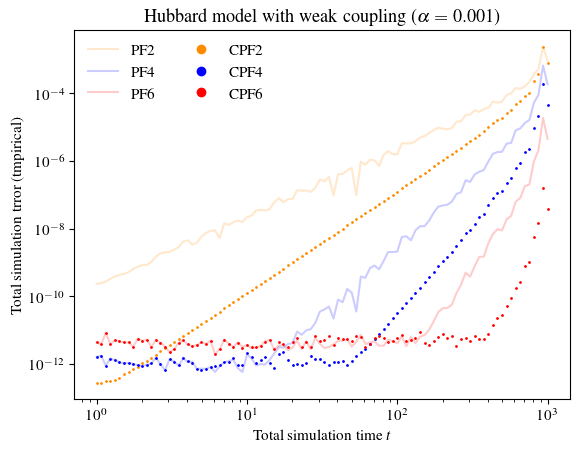

In [56]:
fig, ax = plt.subplots()

num_time_ticks = len(time_ticks)
x = time_ticks


y_PF2_error_hub_wc  = [data_CPF2_perturbed_sys_hub_wc[i][2] for i in range(0,num_time_ticks)]
y_CPF2_error_hub_wc = [data_CPF2_perturbed_sys_hub_wc[i][3] for i in range(0,num_time_ticks)]

y_PF4_error_hub_wc  = [data_CPF4_perturbed_sys_hub_wc[i][2] for i in range(0,num_time_ticks)]
y_CPF4_error_hub_wc = [data_CPF4_perturbed_sys_hub_wc[i][3] for i in range(0,num_time_ticks)]

y_PF6_error_hub_wc  = [data_CPF6_perturbed_sys_hub_wc[i][2] for i in range(0,num_time_ticks)]
y_CPF6_error_hub_wc = [data_CPF6_perturbed_sys_hub_wc[i][3] for i in range(0,num_time_ticks)]


plt.loglog(x, y_PF2_error_hub_wc  , color='darkorange',  label='PF2',  markersize=2, alpha=0.2)
plt.loglog(x, y_PF4_error_hub_wc  , color='blue',  label='PF4',  markersize=2, alpha=0.2)
plt.loglog(x, y_PF6_error_hub_wc  , color='red',  label='PF6',  markersize=2, alpha=0.2)

plt.loglog(x, y_CPF2_error_hub_wc , '.', color='darkorange' ,  label='CPF2', markersize=2)
plt.loglog(x, y_CPF4_error_hub_wc , '.', color='blue' ,  label='CPF4', markersize=2)
plt.loglog(x, y_CPF6_error_hub_wc , '.', color='red' ,  label='CPF6', markersize=2)

plt.xlabel('Total simulation time $t$')
plt.ylabel('Total simulation trror (tmpirical)')


ax.legend(markerscale=6, ncol=2, #, loc='upper center', bbox_to_anchor=(0.5, 1.05)
          fancybox=True, frameon=False #, shadow=True
         )

plt.title('Hubbard model with weak coupling ($\\alpha=0.001$)')
plt.show()

fig.savefig('../plots/CPFs_hub_wc.pdf', dpi=300, bbox_inches='tight', transparent=False)